In [1]:
import pandas  as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# 1)Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [14]:
#hierarchical clustering
data=pd.read_csv("D:\\Data Science-Ayesha\\crime_data (1).csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
#normalizaton function
def norm_func(i):
    X=(i-i.min()/(i.max()-i.min()))
    return(X)
       

In [16]:
df_norm=norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137
5,7.851807,203.84589,77.457627,38.51137
6,3.251807,109.84589,76.457627,10.91137
7,5.851807,237.84589,71.457627,15.61137
8,15.351807,334.84589,79.457627,31.71137
9,17.351807,210.84589,59.457627,25.61137


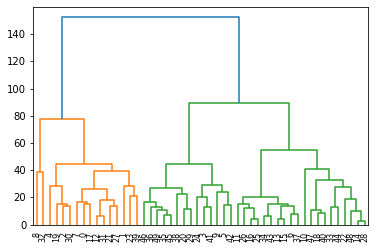

In [17]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method = 'average'))


In [18]:
#create cluster
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [19]:
#save clusters for chart
y_hc=hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, 2, 1, 2, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [20]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])
data['h_clusterid']=hc.labels_
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


# K_Means

In [2]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
#normalization function
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_dif=scaler.fit_transform(data.iloc[:,1:])

NameError: name 'data' is not defined

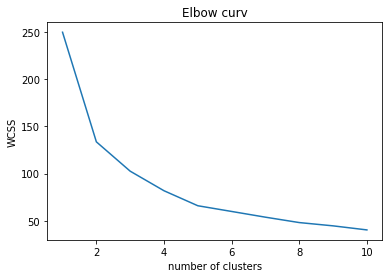

In [39]:
#optinumnumber of cluster
#with in cluster sum of square creterion
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaler_dif)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()



In [3]:
#build cluster alogrithm
from sklearn.cluster import KMeans

In [43]:
model_new=KMeans(n_clusters=4)
model_new.fit(scaler_dif)


KMeans(n_clusters=4)

In [44]:
model_new.labels_

array([3, 3, 2, 0, 2, 2, 1, 0, 2, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 0, 2,
       1, 3, 0, 1, 1, 2, 1, 0, 2, 2, 3, 1, 1, 0, 0, 1, 0, 3, 1, 3, 2, 1,
       1, 0, 0, 1, 1, 0])

In [48]:
data['model_new']=model_new.labels_
model_new.cluster_centers_
#crime

array([[-0.33667108, -0.02023139,  0.40007072, -0.14561538,  1.03653072],
       [-0.81591291, -1.00860514, -0.40406762, -0.73790091, -1.04844487],
       [ 0.75759426,  1.13128272,  0.94567938,  1.22798509,  0.44082341],
       [ 1.4610129 ,  0.99381728, -0.84023734,  0.35649393,  0.58975024]])

In [49]:
data.groupby('model_new').agg(['mean']).reset_index()

,model_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,6.336364,169.090909,71.272727,19.881818,1.909091
1,1,4.270000,87.550000,59.750000,14.390000,0.000000
2,2,11.054545,264.090909,79.090909,32.618182,1.363636
3,3,14.087500,252.750000,53.500000,24.537500,1.500000


In [50]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,model_new
0,Alabama,13.2,236,58,21.2,1,3
1,Alaska,10.0,263,48,44.5,1,3
2,Arizona,8.1,294,80,31.0,1,2
3,Arkansas,8.8,190,50,19.5,2,0
4,California,9.0,276,91,40.6,1,2
5,Colorado,7.9,204,78,38.7,2,2
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,3,2
9,Georgia,17.4,211,60,25.8,2,3


# DBSCAN(Density-based spatial clustering of applications with noise)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137


In [53]:
array=df_norm.values
array

array([[ 13.15180723, 235.84589041,  57.45762712,  21.01136951],
       [  9.95180723, 262.84589041,  47.45762712,  44.31136951],
       [  8.05180723, 293.84589041,  79.45762712,  30.81136951],
       [  8.75180723, 189.84589041,  49.45762712,  19.31136951],
       [  8.95180723, 275.84589041,  90.45762712,  40.41136951],
       [  7.85180723, 203.84589041,  77.45762712,  38.51136951],
       [  3.25180723, 109.84589041,  76.45762712,  10.91136951],
       [  5.85180723, 237.84589041,  71.45762712,  15.61136951],
       [ 15.35180723, 334.84589041,  79.45762712,  31.71136951],
       [ 17.35180723, 210.84589041,  59.45762712,  25.61136951],
       [  5.25180723,  45.84589041,  82.45762712,  20.01136951],
       [  2.55180723, 119.84589041,  53.45762712,  14.01136951],
       [ 10.35180723, 248.84589041,  82.45762712,  23.81136951],
       [  7.15180723, 112.84589041,  64.45762712,  20.81136951],
       [  2.15180723,  55.84589041,  56.45762712,  11.11136951],
       [  5.95180723, 114

In [56]:
stscaler = StandardScaler().fit(array)
D = stscaler.transform(array)
D

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [57]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(D)

DBSCAN(eps=2)

In [58]:
dbscan.labels_
#noisy samples is -1

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [60]:
df_norm['Cluster']=pd.DataFrame(dbscan.labels_)
df_norm

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.151807,235.84589,57.457627,21.01137,0
1,9.951807,262.84589,47.457627,44.31137,-1
2,8.051807,293.84589,79.457627,30.81137,0
3,8.751807,189.84589,49.457627,19.31137,0
4,8.951807,275.84589,90.457627,40.41137,0
5,7.851807,203.84589,77.457627,38.51137,0
6,3.251807,109.84589,76.457627,10.91137,0
7,5.851807,237.84589,71.457627,15.61137,0
8,15.351807,334.84589,79.457627,31.71137,0
9,17.351807,210.84589,59.457627,25.61137,0


In [62]:
df_norm['Cluster'].value_counts()

 0    49
-1     1
Name: Cluster, dtype: int64

In [63]:
metrics.silhouette_score(D,dbscan.labels_)
metrics.silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [64]:
1/49


0.02040816326530612

In [65]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [66]:
clust=pd.concat([df_norm,cl],axis=1)
clust

,Murder,Assault,UrbanPop,Rape,Cluster,cluster
0,13.151807,235.84589,57.457627,21.01137,0,0
1,9.951807,262.84589,47.457627,44.31137,-1,-1
2,8.051807,293.84589,79.457627,30.81137,0,0
3,8.751807,189.84589,49.457627,19.31137,0,0
4,8.951807,275.84589,90.457627,40.41137,0,0
5,7.851807,203.84589,77.457627,38.51137,0,0
6,3.251807,109.84589,76.457627,10.91137,0,0
7,5.851807,237.84589,71.457627,15.61137,0,0
8,15.351807,334.84589,79.457627,31.71137,0,0
9,17.351807,210.84589,59.457627,25.61137,0,0


2)Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [6]:
import pandas as pd

In [7]:
Airline=pd.read_csv("D:\\Data Science-Ayesha\\EastWestAirlines.csv")

In [8]:
Airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
Ar2= Airline.drop(['ID#'],axis=1)
Ar2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
Ar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [11]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
df_norm=norm_func(Ar2.iloc[:,1:])

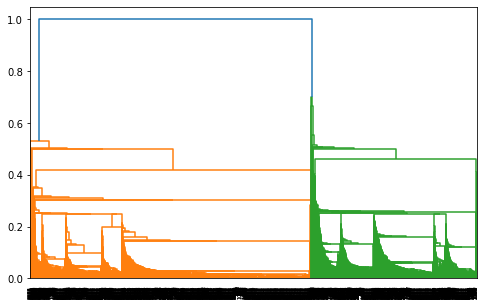

In [22]:
plt.figure(figsize=(8,5))
dendrogram=sch.dendrogram(sch.linkage(df_norm))

In [23]:

hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [24]:
#save cluster for chart
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [25]:
clusters= pd.DataFrame(y_hc,columns=['clusters'])


In [16]:
Ar2['h_clusterid']=hc.labels_
Ar2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


# KMeans

In [17]:
scaler=StandardScaler()
scaler_dif=scaler.fit_transform(Ar2.iloc[:,1:])

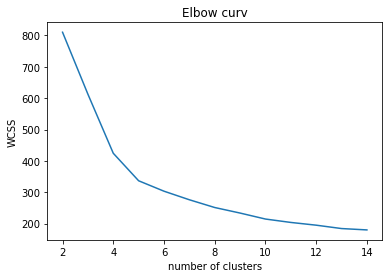

In [28]:
#optimum number of clusters
wcss=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,15),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()
   

In [44]:
model_new=KMeans(n_clusters=5)
model_new.fit(df_norm)
model_new.labels_

array([4, 4, 4, ..., 1, 2, 2])

In [45]:
Ar2['clusterid_new']=model_new.labels_
Ar2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,2


In [46]:
model_new.cluster_centers_

array([[ 6.59020789e-03,  6.46035599e-01,  8.09061489e-04,
         5.66343042e-03,  1.19022293e-01,  2.00383834e-01,
         7.27197078e-03,  1.18458814e-02,  5.32620376e-01,
        -4.99600361e-16],
       [ 1.77912301e-02,  7.28960396e-01,  6.18811881e-04,
         6.49752475e-03,  1.72970238e-01,  2.34903868e-01,
         2.31602349e-02,  4.04212591e-02,  5.86139300e-01,
         1.00000000e+00],
       [ 8.44382696e-03,  1.76841085e-02,  8.23643411e-03,
         1.69573643e-03,  1.23045313e-02,  7.17842978e-02,
         6.90692719e-03,  1.13902296e-02,  2.39980966e-01,
         3.94129174e-15],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 8.06451613e-03,  3.05299539e-02,  9.79262673e-03,
         2.88018433e-04,  1.31485480e-02,  8.03906334e-02,
         7.91232441e-03,  1.37379358e-02,  6.71078504e-01,
         1.

In [48]:
Ar2.iloc[:,1:5].groupby(Ar2['clusterid_new']).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles
clusterid_new,,,,
0,73.467638,3.584142,1.001618,1.022654
1,198.336634,3.915842,1.001238,1.025990
2,94.131783,1.070736,1.016473,1.006783
3,290.453195,1.156018,1.032689,1.008915
4,89.903226,1.122120,1.019585,1.001152


# DBSCAN

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [51]:
Ar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  h_clusterid        3999 non-null   int64
 12  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [54]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [55]:
Ar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  h_clusterid        3999 non-null   int64
 12  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [57]:
df=Ar2.iloc[:,1:5]
df.values

array([[0, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       ...,
       [0, 3, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1]], dtype=int64)

In [59]:
scaler=StandardScaler().fit(df.values)

In [60]:
D=scaler.transform(df.values)

In [61]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(D)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [65]:
pd.concat([Ar2,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,4,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,4,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,4,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,4,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,3,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,3,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,2,0
